In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [5]:
ev_dataset = pd.read_csv('/Users/maheshg/Dropbox/Sample Datasets Kaggle/Electric_Vehicle_Population_Data.csv')

In [16]:
ev_dataset.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,186876.000000,186879.000000,186879.000000,186879.000000,186476.000000,1.868790e+05,1.868760e+05
mean,98177.500144,2020.659614,56.707790,1011.918487,29.069012,2.225627e+08,5.297773e+10
std,2374.643395,2.991398,90.788807,8115.767740,14.900971,7.463672e+07,1.570887e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.850864e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.302081e+08,5.303303e+10
75%,98371.000000,2023.000000,73.000000,0.000000,42.000000,2.577993e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [10]:
ev_dataset.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P6C58K,King,Seattle,WA,98115.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,43.0,259254397,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5YJSA1DN4D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,35.0,127420940,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJSA1E26J,King,Kent,WA,98042.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,47.0,170287183,POINT (-122.1145138 47.3581107),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,WBY2Z2C54E,King,Bellevue,WA,98004.0,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,41.0,205545868,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,5YJXCDE23J,King,Bellevue,WA,98004.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,41.0,237977386,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [7]:
ev_dataset['2020 Census Tract'] = ev_dataset['2020 Census Tract'].astype(float)

In [8]:
ev_dataset.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [9]:
#Generate the population mean : 
mu = np.mean(ev_dataset['DOL Vehicle ID'])
#Generate the standard deviation of the population : 
sd = np.std(ev_dataset['DOL Vehicle ID'])

In [10]:
#Generating large set of observations from the overall population: 
observations_ev_vehicle = np.random.normal(mu,sd, size=100000)

In [11]:
observations_ev_vehicle = observations_ev_vehicle.astype(float).astype(int)

In [12]:
observations_ev_vehicle.dtype

dtype('int64')

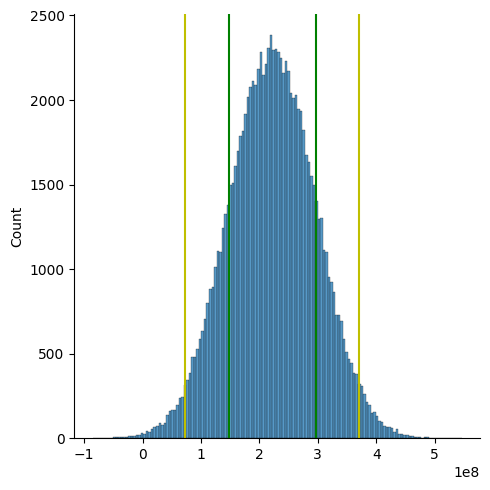

In [18]:
sns.displot(observations_ev_vehicle)

plt.axvline(np.mean(observations_ev_vehicle) + np.std(observations_ev_vehicle), color = "g")
plt.axvline(np.mean(observations_ev_vehicle) - np.std(observations_ev_vehicle), color = "g")

plt.axvline(np.mean(observations_ev_vehicle) + np.std(observations_ev_vehicle) * 2, color = "y")
plt.axvline(np.mean(observations_ev_vehicle) - np.std(observations_ev_vehicle) * 2, color = "y")


In [13]:
pd.Series(observations_ev_vehicle).describe()

count    1.000000e+05
mean     2.221908e+08
std      7.439265e+07
min     -8.500428e+07
25%      1.717247e+08
50%      2.221612e+08
75%      2.726240e+08
max      5.461218e+08
dtype: float64

In [19]:
#Taking the 3 samples of EV Observations : 
Sample_A = np.random.choice(observations_ev_vehicle,400) 
Sample_B = np.random.choice(observations_ev_vehicle,400)
Sample_C = np.random.choice(observations_ev_vehicle,400)

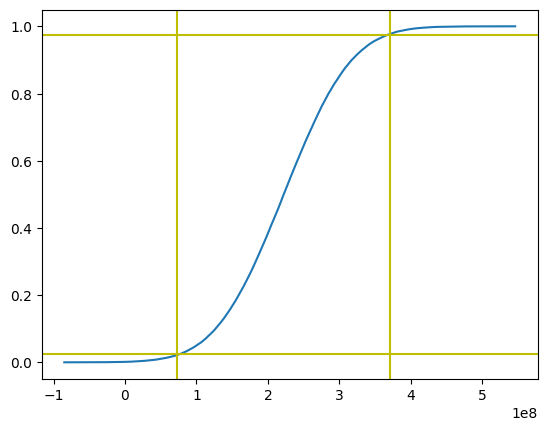

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

ecdf = ECDF(observations_ev_vehicle)

plt.plot(ecdf.x, ecdf.y)

plt.axhline(y = 0.025, color = 'y', linestyle='-')
plt.axvline(x = np.mean(observations_ev_vehicle) - (2 * np.std(observations_ev_vehicle)), color = 'y', linestyle='-')

plt.axhline(y = 0.975, color = 'y', linestyle='-')
plt.axvline(x = np.mean(observations_ev_vehicle)+ (2 * np.std(observations_ev_vehicle)), color= 'y', linestyle='-')


In [13]:
ev_dataset.shape

(186879, 17)

In [14]:
ev_dataset['Model'].unique

<bound method Series.unique of 0                 I3
1            MODEL S
2            MODEL S
3                 I8
4            MODEL X
             ...    
186874    RAV4 PRIME
186875       MODEL Y
186876        FUSION
186877       MODEL Y
186878       MODEL Y
Name: Model, Length: 186879, dtype: object>

In [15]:
ev_dataset['Make'].unique

<bound method Series.unique of 0            BMW
1          TESLA
2          TESLA
3            BMW
4          TESLA
           ...  
186874    TOYOTA
186875     TESLA
186876      FORD
186877     TESLA
186878     TESLA
Name: Make, Length: 186879, dtype: object>

In [18]:
ev_dataset['Model'].value_counts()

Model
MODEL Y        38648
MODEL 3        30714
LEAF           13435
MODEL S         7831
BOLT EV         7056
               ...  
745LE              2
918                1
750E               1
S-10 PICKUP        1
BENTAYGA           1
Name: count, Length: 143, dtype: int64

In [19]:
ev_dataset['Make'].value_counts()

Make
TESLA                   83349
NISSAN                  14181
CHEVROLET               14072
FORD                     9836
KIA                      7885
BMW                      7856
TOYOTA                   6766
VOLKSWAGEN               5295
JEEP                     4927
HYUNDAI                  4784
RIVIAN                   4540
VOLVO                    4407
AUDI                     3808
CHRYSLER                 3281
MERCEDES-BENZ            1737
PORSCHE                  1163
MITSUBISHI                991
MINI                      943
POLESTAR                  897
SUBARU                    859
HONDA                     843
FIAT                      784
DODGE                     614
MAZDA                     550
LEXUS                     506
CADILLAC                  490
LINCOLN                   275
SMART                     260
LUCID                     249
JAGUAR                    232
GENESIS                   204
FISKER                    166
LAND ROVER                 57
ALFA 

In [22]:
top_model = ev_dataset['Model'].head(10)
top_make = ev_dataset['Make'].head(10)

In [23]:
print(top_model,top_make)

0         I3
1    MODEL S
2    MODEL S
3         I8
4    MODEL X
5         I4
6    MODEL 3
7       ID.4
8     E-GOLF
9        500
Name: Model, dtype: object 0           BMW
1         TESLA
2         TESLA
3           BMW
4         TESLA
5           BMW
6         TESLA
7    VOLKSWAGEN
8    VOLKSWAGEN
9          FIAT
Name: Make, dtype: object


In [26]:
###Distribution of make : 
plt.figure(figsize=(12, 6))

TypeError: 'module' object is not callable